In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore all future warnings   
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


In [4]:
df=pd.read_csv("CardioGoodFitness.csv")
df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66


In [5]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [8]:
#for categorical data to be converted to numerical field

df["MaritalStatus"]=df["MaritalStatus"].replace("Single",1)
df["MaritalStatus"]=df["MaritalStatus"].replace("Partnered",2)

df["Gender"]=df["Gender"].replace("Male",1)
df["Gender"]=df["Gender"].replace("Female",2)

In [9]:
df.describe()

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,1.422222,15.572222,1.594444,3.455556,3.311111,53719.577778,103.194444
std,6.943498,0.495291,1.617055,0.492369,1.084797,0.958869,16506.684226,51.863605
min,18.000000,1.000000,12.000000,1.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,1.000000,14.000000,1.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,1.000000,16.000000,2.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,2.000000,16.000000,2.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,2.000000,21.000000,2.000000,7.000000,5.000000,104581.000000,360.000000


# Gaussian Naive Bayes

In [15]:
#Determine X, y
#Separating independent and dependent variables
X=df[["Age","Gender","Education","MaritalStatus","Usage","Fitness","Income","Miles"]]
y=df[["Product"]]

In [102]:
#Split into train and test(validation) data set.

#Using stratify = y, we make the distribution of y (Product) similar in train and test data sets
#random_state = 101 ensures we get same results every time we run the program
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.25)

print(X_train.shape, y_train.shape)
print((X_test.shape, y_test.shape))

(135, 8) (135, 1)
((45, 8), (45, 1))


In [35]:
#Naive Bayes is a classification algorithm suitable for binary and multiclass classification.
#Assumption: Even if the features are interdependent, these features are still considered independently.

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [103]:
# Fitting the Naive Bayes Model

# We’re fitting the model on the training data and trying to predict the model on test data.
model = gnb.fit(X_train,y_train)

C:\Users\shgilani.ORADEV\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [104]:
model.score(X_train, y_train)

0.6444444444444445

In [105]:
model.score(X_test, y_test)

0.5111111111111111

In [38]:
#Predict
predictions = gnb.predict(X_test)

#Print predictions
predictions[0:5]

array(['TM195', 'TM195', 'TM195', 'TM798', 'TM498'], dtype='<U5')

In [53]:
# Making the Confusion Matrix to understand deviation between actual y and predicted y
from sklearn.metrics import confusion_matrix

# Predicting the Test set results
yTrain_pred = gnb.predict(X_train)
yTest_pred = gnb.predict(X_test)

cm1 = confusion_matrix(y_test, yTest_pred)
cm2 = confusion_matrix(y_train, yTrain_pred)

In [54]:
cm1

array([[ 8, 11,  1],
       [ 8,  6,  1],
       [ 1,  0,  9]], dtype=int64)

In [55]:
cm2

array([[38, 20,  2],
       [21, 23,  1],
       [ 4,  0, 26]], dtype=int64)

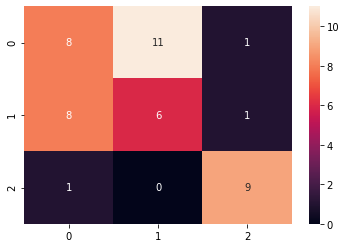

In [75]:
sns.heatmap(cm1, annot=True)
plt.show()

# Enable User to enter cloumn values for 'x' and predict 'y'

In [61]:
fit=int(input("Enter the fitness score "))
age=int(input("Enter the age of the customer "))
gender=int(input("Enter the gender of the customer (1-Male / 2-Female "))
edu=int(input("Enter the number of years of education "))
marital=int(input("Enter the marital status (1-Single / 2-Partnered "))
usage=int(input("Enter the no of days in the week the customer plans to use the threamill (1 to 7) "))
income =int(input("Enter the income "))
mile=int(input("Enter the number of miles you usually run on the threadmill"))

Enter the fitness score 4
Enter the age of the customer 35
Enter the gender of the customer (1-Male / 2-Female 1
Enter the number of years of education 15
Enter the marital status (1-Single / 2-Partnered 2
Enter the no of days in the week the customer plans to use the threamill (1 to 7) 5
Enter the income 80000
Enter the number of miles you usually run on the threadmill60000


In [72]:
user_values=[[fit,age,gender,edu,marital,usage,income,mile]]
buy_product=model.predict(user_values)
buy_product

array(['TM798'], dtype='<U5')

# Cross Validation

In [76]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

In [84]:
# Perform 5-fold cross validation
cv_score = cross_val_score(gnb, X, y, cv=5)

#print("Naive Bayes accuracy score - Cross Validation is:",cv_score)
cv_score

C:\Users\shgilani.ORADEV\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shgilani.ORADEV\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shgilani.ORADEV\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shgilani.ORADEV\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

array([0.55555556, 0.63888889, 0.61111111, 0.47222222, 0.55555556])

In [89]:
#Now, let’s make predictions, after performing cross validation:
predictions_cv = cross_val_predict(gnb, X, y, cv=5)
predictions_cv[0:5]

C:\Users\shgilani.ORADEV\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shgilani.ORADEV\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shgilani.ORADEV\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shgilani.ORADEV\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

array(['TM195', 'TM195', 'TM195', 'TM195', 'TM195'], dtype='<U5')